### Student Performance Indicator

Life Cycle of Machine Learning Project

1. Understanding the Problem Statement
2. Data Collection
3. Data Checks to perform
4. Exploratory Data analysis
5. Data Pro-Processing 
6. Model Training
7. Choose Best Model

1) Problem Statement: - This project understands how the student's performance (test scores) is affected by other variables such as Gender , Ethnicity, Parental level of Education, Lunch and Test Preparation course.
2) The Dataset consists of 8 columns and 1000 rows 

### Importing the necessary libraries

In [5]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

### Import the CSV Data as Pandas DataFrame

In [7]:
df = pd.read_csv('data/stud.csv')

### Import the CSV Data as Pandas DataFrame

In [9]:
df = pd.read_csv('data/stud.csv')

In [10]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Dataset Information
-  gender : sex of students -> (Male/female)-  
race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
-  
parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate  s degree,high schoo
-  )
lunch : having lunch before test (standard or free/reduc
-  d)
test preparation course : complete or not complete before 
-  est
math 
-  core
reading
-  score
writing score

### Data Checks to Perform 
-  Check Missing Values
-  Check Duplicates
-  Check Data Type
-  Check the number of unique values of each column
-  Check Statistics
-  Check various categories present in the different categorical column

### Checking Missing Values

### Check Duplicates

In [15]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

There are no null values in the dataset

In [17]:
df.duplicated().sum()

0

There are no duplicates in the dataset

### Check Data Types

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### Checking the numberof Unique values in each column

In [22]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

### Check Statistics of the DataSet

In [24]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### Insights

-  All means are very close to each other - between 66 and 68.05
-  all Standard Deviations are also close between 14.6 and 15.19
-  There is a huge difference between the minimum scores of math and writing

In [26]:
print("Categories in 'gender' variable: ",end=" ")
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable: ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in 'parental level of Education' variable: ",end=" ")
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable: ",end=" ")
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable: ",end=" ")
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:  ['female' 'male']
Categories in 'race_ethnicity' variable:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of Education' variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:  ['standard' 'free/reduced']
Categories in 'test preparation course' variable:  ['none' 'completed']


In [27]:
## Numerical and Categorical Features
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

In [28]:
print('We have {} numerical features : {}'.format(len(numerical_features),numerical_features))
print('\nWe have {} Categortical features : {}'.format(len(categorical_features),categorical_features))

We have 3 numerical features : ['math_score', 'reading_score', 'writing_score']

We have 5 Categortical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


### Adding Columns for Total_score and Average Score

In [30]:
df['total_score'] = df['math_score'] + df["reading_score"] + df['writing_score']
df['average'] = df['total_score']/3

In [31]:
df.head()  

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [32]:
reading_full = df[df['reading_score'] == 100]['average'].count()
writing_full = df[df['writing_score'] == 100]['average'].count()
math_full = df[df['math_score'] == 100]['average'].count()

print(f'Number of Students with full marks in Maths:{math_full}')
print(f'Number of Students with full marks in Writing:{writing_full}')
print(f'Number of Students with full marks in Reading:{reading_full}')

Number of Students with full marks in Maths:7
Number of Students with full marks in Writing:14
Number of Students with full marks in Reading:17


In [33]:
reading_less_20 = df[df['reading_score']<=20]['average'].count()
writing_less_20 = df[df['writing_score']<=20]['average'].count()
math_less_20 = df[df['math_score']<=20]['average'].count()

print(f'Number of Students with less than 20 marks in maths {math_less_20}')
print(f'Number of Students with less than 20 marks in writing {writing_less_20}')
print(f'Number of Students with less than 20 marks in reading {reading_less_20}')

Number of Students with less than 20 marks in maths 4
Number of Students with less than 20 marks in writing 3
Number of Students with less than 20 marks in reading 1


Insights
-  From above values we get students have performed the worst in Math
-  Best Performance is in reading Section

### Data Vizualization

#### Visualize average Score distribution to make some conclusion
- Histogram
- Kenel Distribution Function(KDE)

##### Histogram & KDE

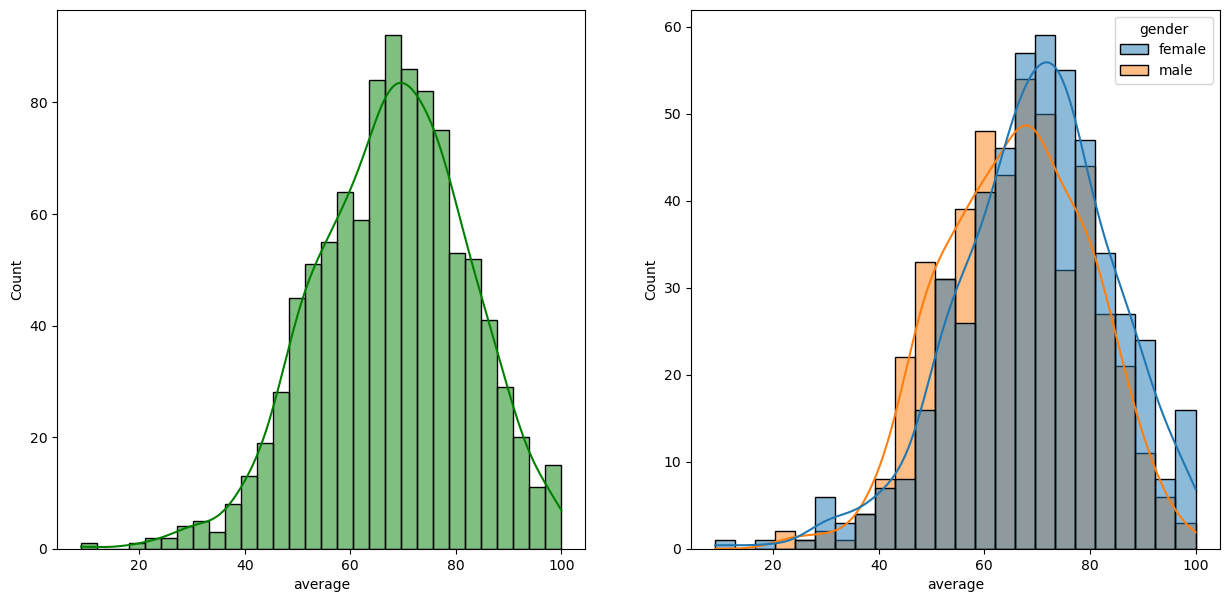

In [38]:
fig, axs = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

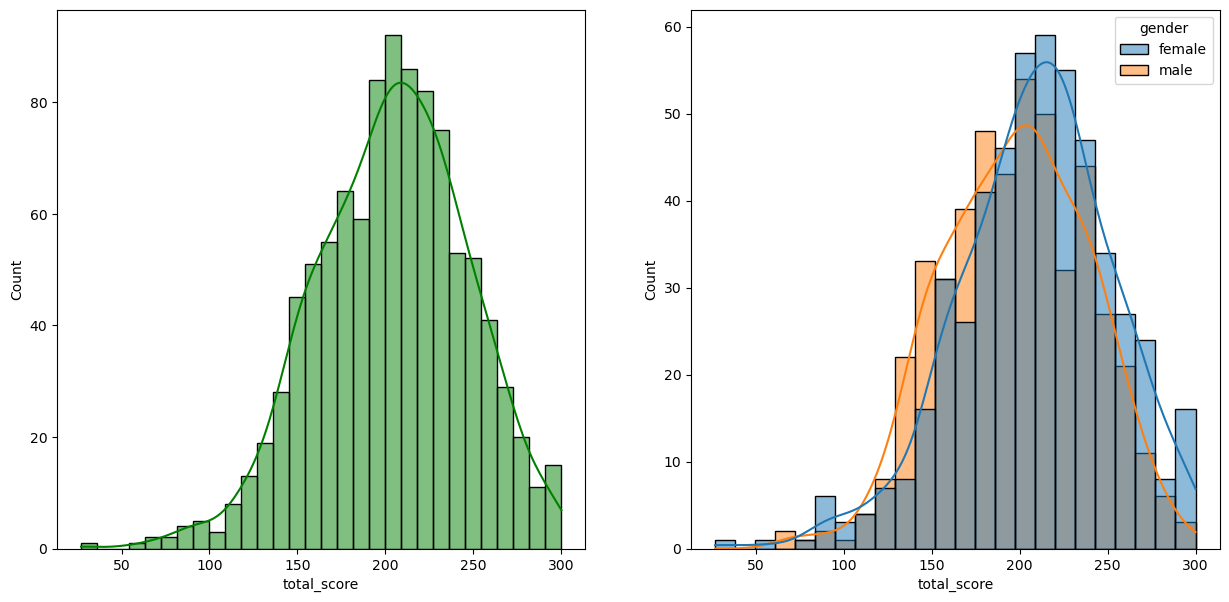

In [39]:
fig,axs=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='total_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total_score',kde=True,hue='gender')
plt.show()

#### Insights

- Girls have better average and toal performance compared to boys 

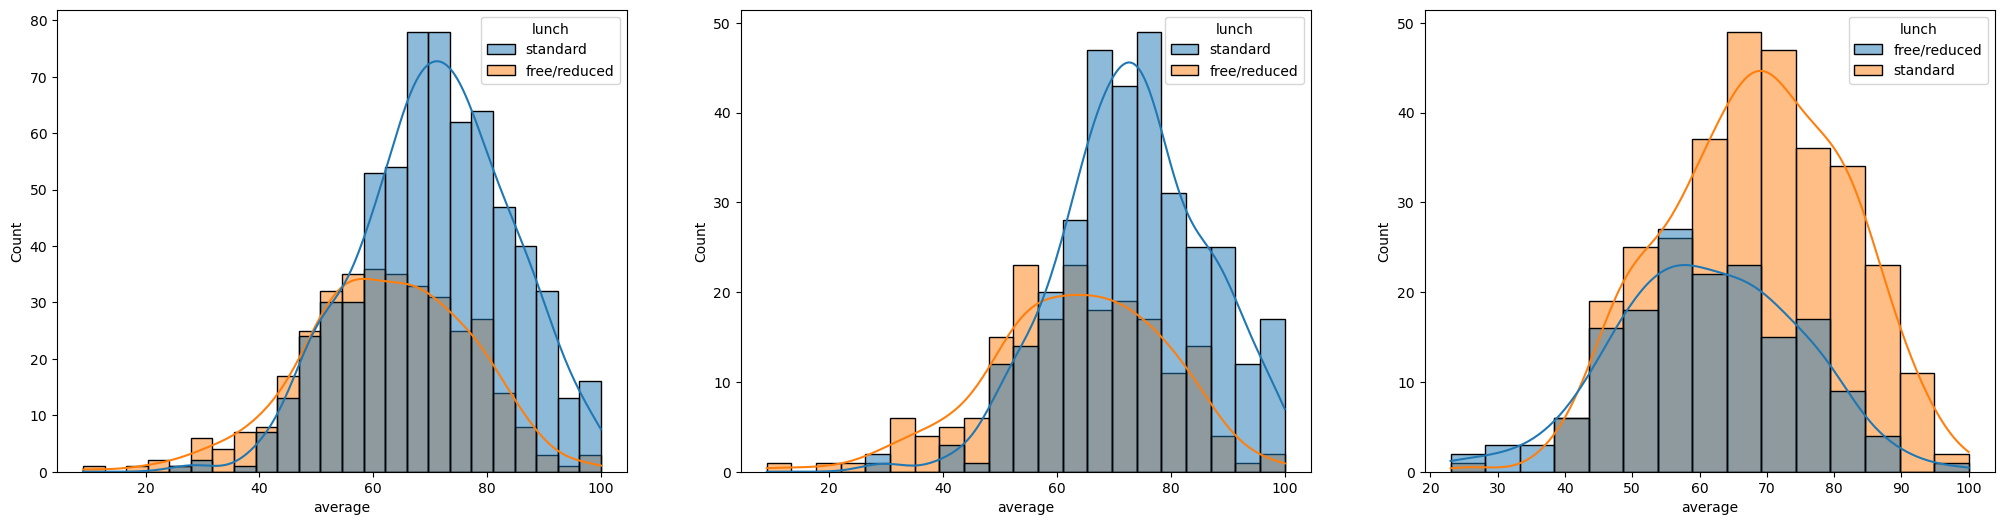

In [41]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()

#### Insights 
- Standard Lunch Performs well in the exams

<Axes: xlabel='average', ylabel='Count'>

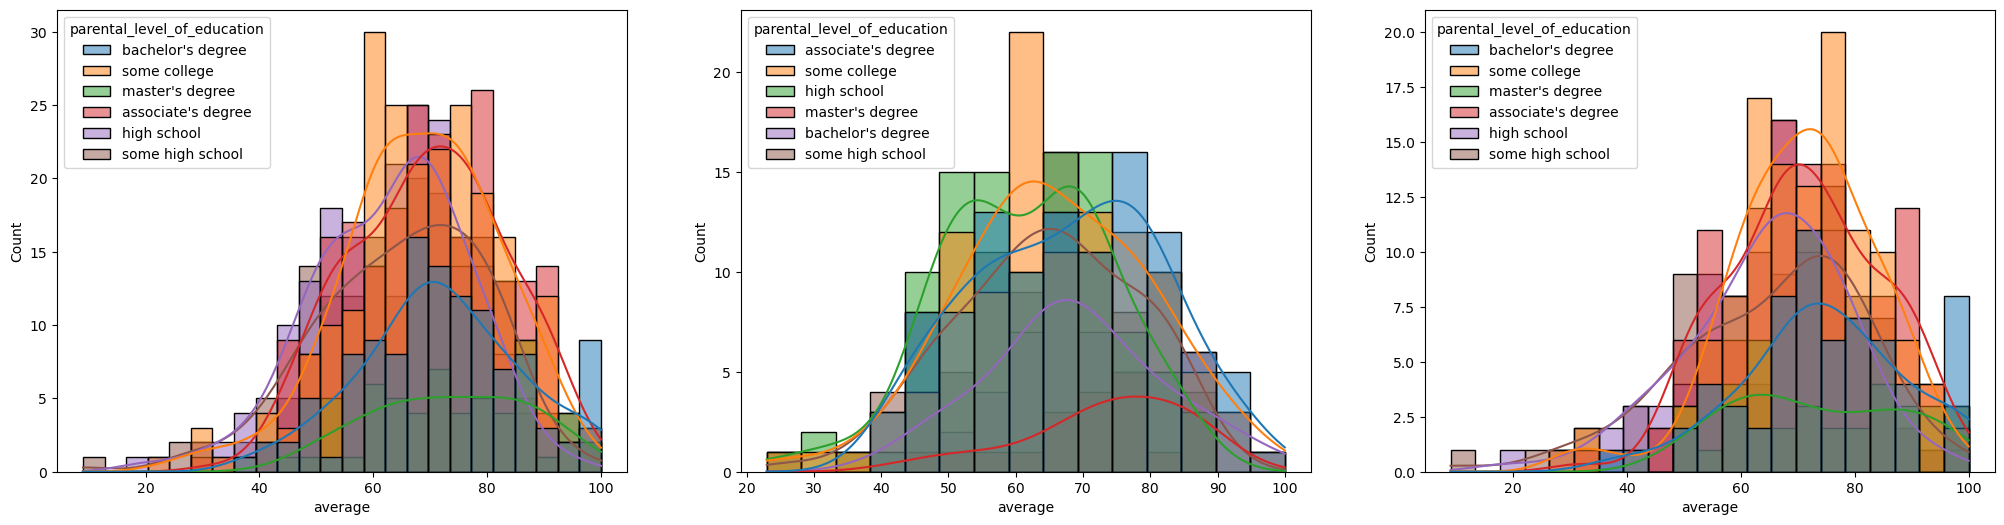

In [43]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x='average',kde=True,hue='parental_level_of_education')
plt.subplot(132)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental_level_of_education')
plt.subplot(133)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental_level_of_education')

Insights: - Ingeneral Parental level of education does not contribute to marks of the child 

<Axes: xlabel='average', ylabel='Count'>

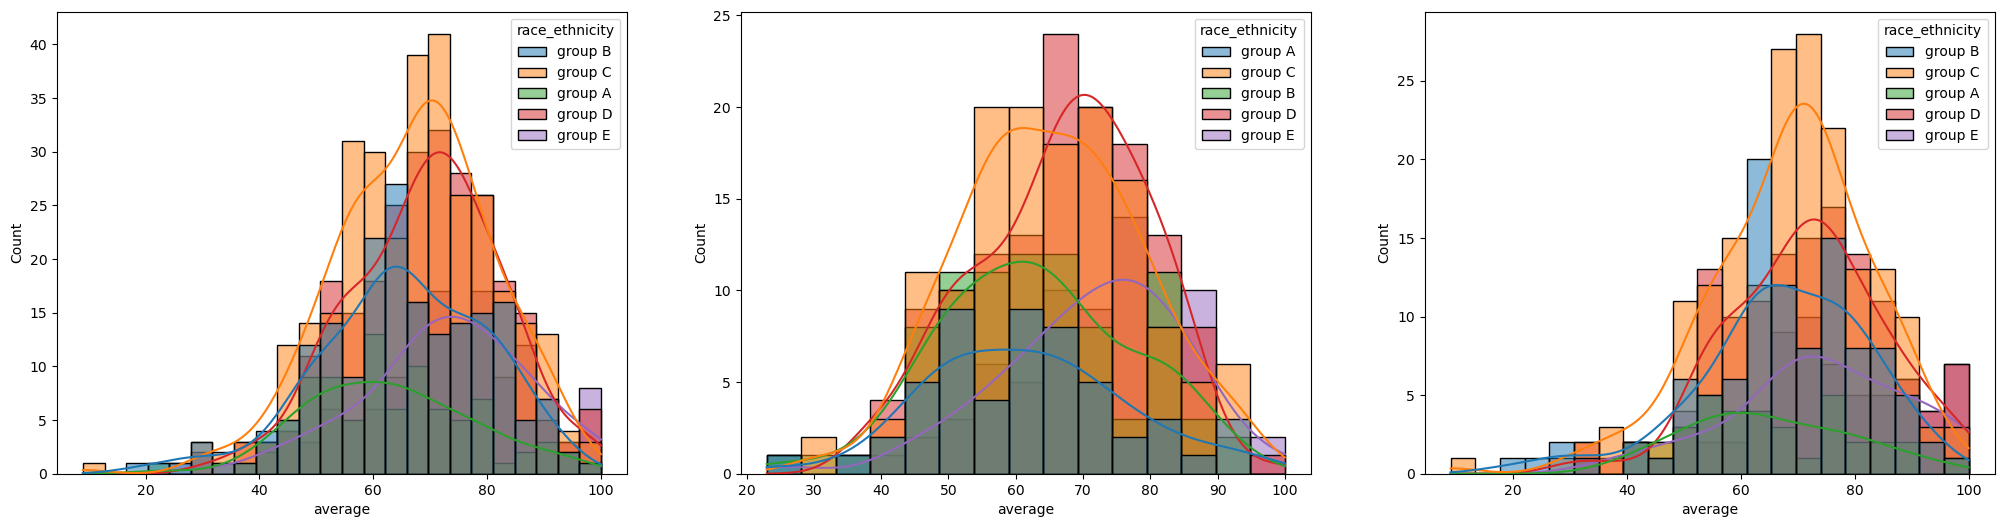

In [45]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x='average',kde=True,hue='race_ethnicity')
plt.subplot(132)
sns.histplot(data=df[df['gender']=='male'],x='average',kde=True,hue='race_ethnicity')
plt.subplot(133)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race_ethnicity')

#### Insights : -
  - Group A and B perform bad in the exam irrespective of the gender
  - Group C perform well in both gender
  - Group D perform well in male not in female 

In [47]:
df.head(1)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667


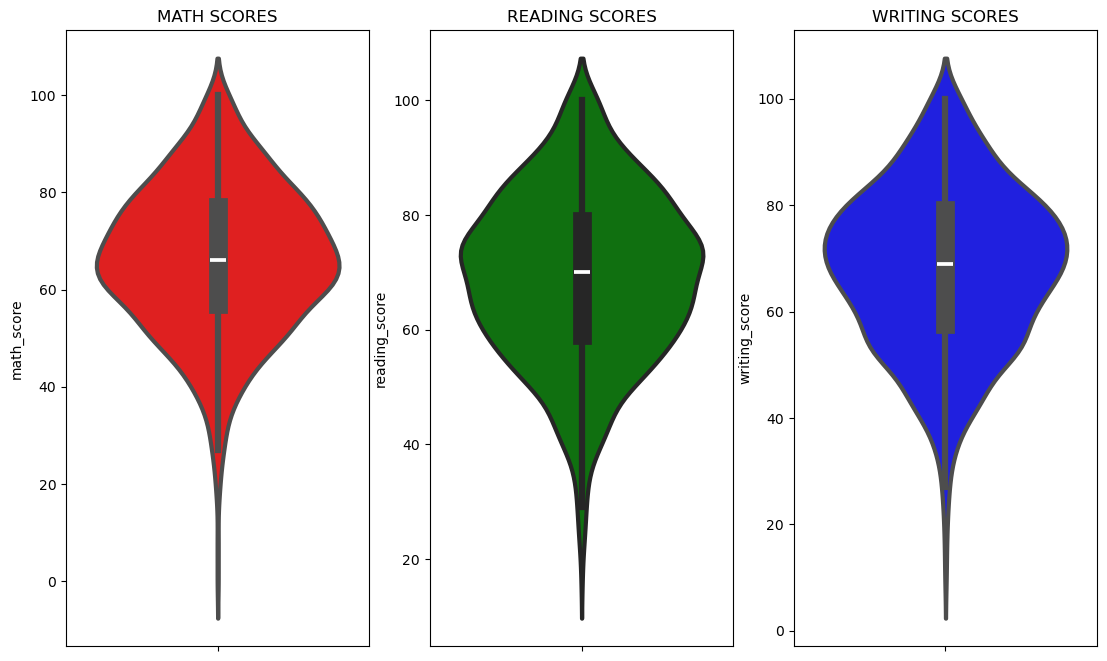

In [48]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

### Insights 
-  Most of the students scored between 60 and 80 marks 

### Multivatriate analysis using pyplot

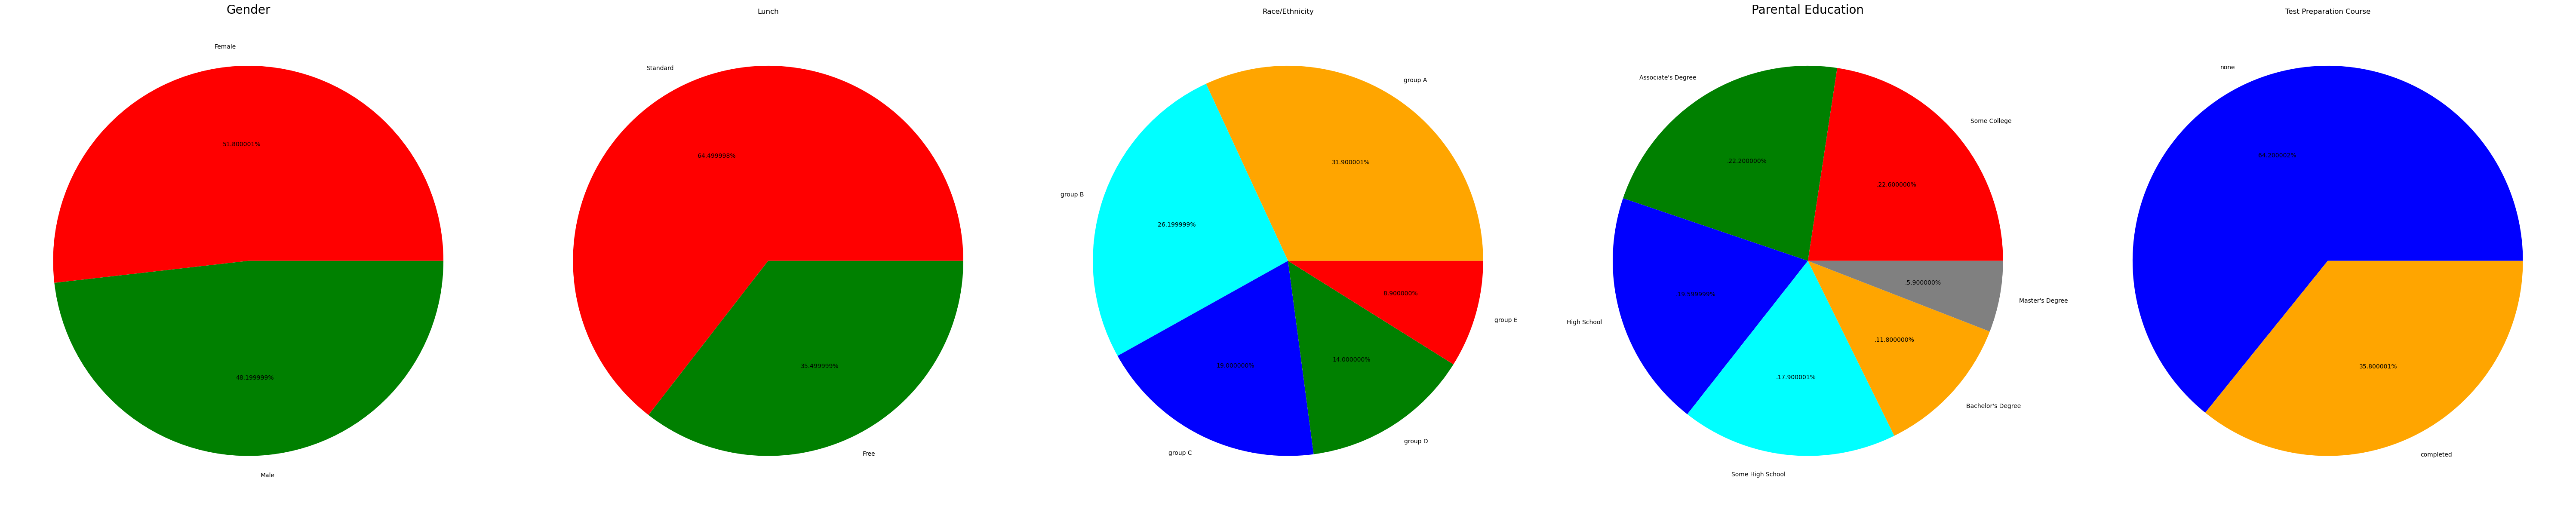

In [112]:
plt.rcParams['figure.figsize'] = (60,24)

plt.subplot(1,5,1)
size=df['gender'].value_counts()
labels = 'Female','Male'
color = ['red','green']

plt.pie(size,colors=color,labels=labels,autopct='%2f%%')
plt.title('Gender',fontsize=20)
plt.axis('off')

plt.subplot(1,5,2)
size=df['lunch'].value_counts()
labels='Standard','Free'
color=['red','green']

plt.pie(size,labels=labels,colors=color,autopct='%2f%%')
plt.title('Lunch')
plt.axis('off')

plt.subplot(1,5,3)
size=df['race_ethnicity'].value_counts()
labels = 'group A','group B','group C','group D','group E'
color = ['orange','cyan','blue','green','red']

plt.pie(size,colors=color,labels=labels,autopct='%2f%%')
plt.title('Race/Ethnicity')
plt.axis('off')

plt.subplot(1, 5, 4)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')

plt.subplot(1,5,5)
size=df['test_preparation_course'].value_counts()
label = 'none','completed'
colors = ['blue','orange']

plt.pie(size,colors=colors,labels=label,autopct='%2f%%')
plt.title('Test Preparation Course')
plt.axis('off')

plt.tight_layout()
plt.grid()

plt.show()

### Insights : -
 - Number of Male and Female Students are almost equal
 - Most Number of students are from Group A
 - Standard Lunch is prefered by Most Students
 - A Large Number of students have not enrolled in any test preparation course

### Checking for Outliers

<Axes: ylabel='average'>

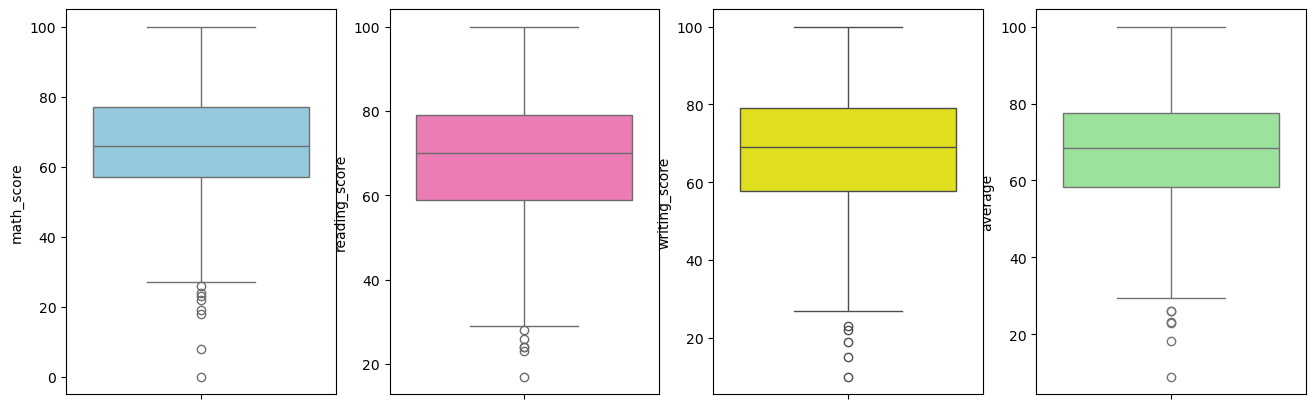

In [135]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(1,4,1)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(1,4,2)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(1,4,3)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(1,4,4)
sns.boxplot(df['average'],color='lightgreen') 

Insights:- Form the above boxplots we can safely say that there are not many outliers in the dataset

### Multivariate Analysis Using Pairplot

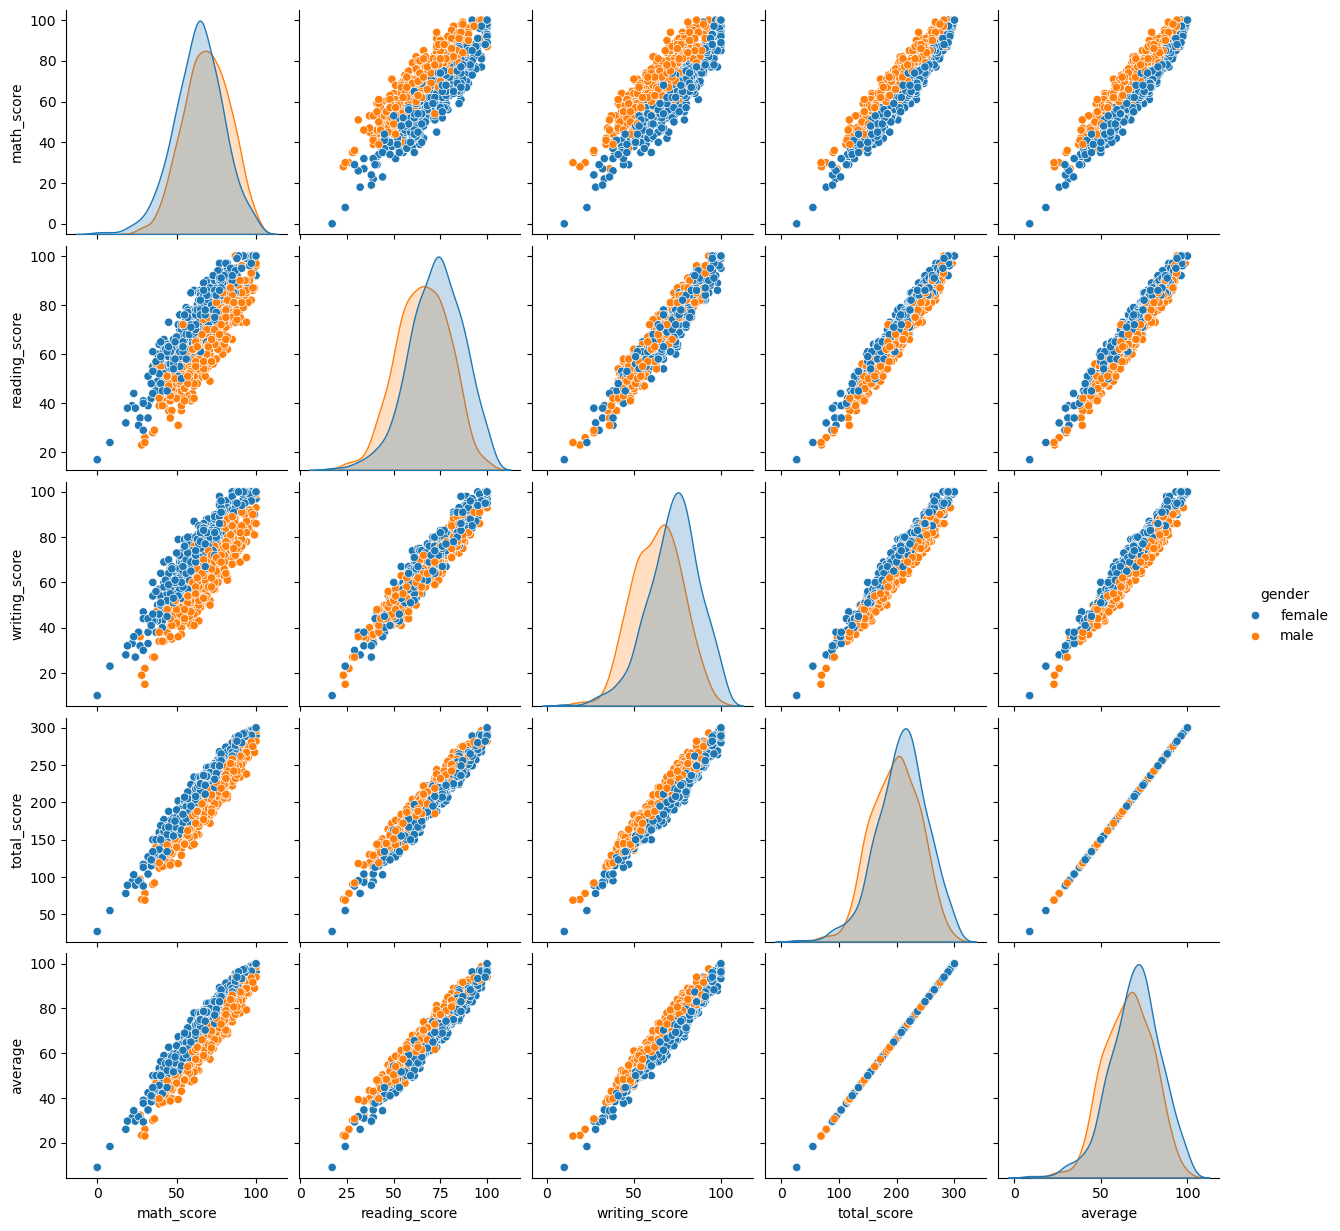

In [137]:
sns.pairplot(df,hue = 'gender')
plt.show()

Insights: -
- From the above plot we can conclude that the scores increase lineraly with each other

### Conclusion: -
- Students performance is realted to lunch, race and Parental_level_of_education
- Females lead in pass percentage and also are top scores
- Students performance is not much related with test prepration course
- Fininshing preparation course is beneficial